# Guide for creating machine learning model to predict if credit card shall be approved or denied 

    import libraries that we will use
   

In [277]:
! pip3 install pandas
! pip3 install numpy
! pip3 install sklearn
! pip3 install matplotlib
! pip3 install scipy
! pip3 install seaborn

In [305]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [279]:
df = pd.read_csv("data.csv")

In [280]:
print (df)

     YearsEmployed  PriorDefault  Credi1Score  Income  approved
0            1.250             1            1       0         1
1            3.040             1            6     560         1
2            1.500             1            0     824         1
3            3.750             1            5       3         1
4            1.710             1            0       0         1
5            2.500             1            0       0         1
6            6.500             1            0   31285         1
7            0.040             1            0    1349         1
8            3.960             1            0     314         1
9            3.165             1            0    1442         1
10           2.165             0            0       0         1
11           4.335             1            0     200         1
12           1.000             1            0       0         1
13           0.040             0            0    2690         1
14           5.000             1        

In [281]:
filt_df = df.loc[:, df.columns != 'PriorDefault']
filt_df = filt_df.loc[:, filt_df.columns != 'Credi1Score']
filt_df = filt_df.loc[:, filt_df.columns != 'approved']
print (filt_df)


     YearsEmployed  Income
0            1.250       0
1            3.040     560
2            1.500     824
3            3.750       3
4            1.710       0
5            2.500       0
6            6.500   31285
7            0.040    1349
8            3.960     314
9            3.165    1442
10           2.165       0
11           4.335     200
12           1.000       0
13           0.040    2690
14           5.000       0
15           0.250       0
16           0.960       0
17           3.170     245
18           0.665       0
19           0.750       0
20           2.500    1208
21           0.835       0
22           7.875    1260
23           3.085      11
24           0.500       0
25           1.500       0
26           5.165       0
27          15.000       0
28           7.000       0
29           5.000   10000
..             ...     ...
645          0.085       0
646          0.165       0
647          0.875       0
648          1.500       0
649          0.040       0
6

In [282]:
low = .17
high = .83
quant_df = filt_df.quantile([low, high])
print(quant_df)

      YearsEmployed  Income
0.17          0.085     0.0
0.83          4.000   831.2


In [283]:
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
# filt_df = pd.concat([filt_df, df['approved']], axis=1)
print (filt_df)


     YearsEmployed  Income
0            1.250     NaN
1            3.040   560.0
2            1.500   824.0
3            3.750     3.0
4            1.710     NaN
5            2.500     NaN
8            3.960   314.0
9            3.165     NaN
10           2.165     NaN
11             NaN   200.0
12           1.000     NaN
15           0.250     NaN
16           0.960     NaN
17           3.170   245.0
18           0.665     NaN
19           0.750     NaN
20           2.500     NaN
21           0.835     NaN
23           3.085    11.0
24           0.500     NaN
25           1.500     NaN
34           0.415   560.0
35           2.000    35.0
36           1.835   713.0
37           0.500   551.0
38           0.250   500.0
39             NaN   300.0
40             NaN   221.0
42           0.750   100.0
44           2.625   284.0
..             ...     ...
638          0.500    68.0
639          0.415    11.0
641          2.290    21.0
642          0.250   390.0
643          1.000    18.0
6

In [284]:
print (df)

     YearsEmployed  PriorDefault  Credi1Score  Income  approved
0            1.250             1            1       0         1
1            3.040             1            6     560         1
2            1.500             1            0     824         1
3            3.750             1            5       3         1
4            1.710             1            0       0         1
5            2.500             1            0       0         1
6            6.500             1            0   31285         1
7            0.040             1            0    1349         1
8            3.960             1            0     314         1
9            3.165             1            0    1442         1
10           2.165             0            0       0         1
11           4.335             1            0     200         1
12           1.000             1            0       0         1
13           0.040             0            0    2690         1
14           5.000             1        

In [285]:
filt_df = pd.concat([df.loc[:,'PriorDefault'],df.loc[:,'Credi1Score'],df.loc[:,'approved'], filt_df], axis=1)

In [286]:
print (filt_df)

     PriorDefault  Credi1Score  approved  YearsEmployed  Income
0               1            1         1          1.250     NaN
1               1            6         1          3.040   560.0
2               1            0         1          1.500   824.0
3               1            5         1          3.750     3.0
4               1            0         1          1.710     NaN
5               1            0         1          2.500     NaN
6               1            0         1            NaN     NaN
7               1            0         1            NaN     NaN
8               1            0         1          3.960   314.0
9               1            0         1          3.165     NaN
10              0            0         1          2.165     NaN
11              1            0         1            NaN   200.0
12              1            0         1          1.000     NaN
13              0            0         1            NaN     NaN
14              1            7         1

In [287]:
filt_df.dropna(inplace=True)
print (filt_df)

     PriorDefault  Credi1Score  approved  YearsEmployed  Income
1               1            6         1          3.040   560.0
2               1            0         1          1.500   824.0
3               1            5         1          3.750     3.0
8               1            0         1          3.960   314.0
17              1           10         1          3.170   245.0
23              1            1         1          3.085    11.0
34              1            5         1          0.415   560.0
35              1           11         1          2.000    35.0
36              1           12         1          1.835   713.0
37              1            2         1          0.500   551.0
38              1            2         1          0.250   500.0
42              1            1         1          0.750   100.0
44              1           11         1          2.625   284.0
54              1            0         1          0.835   300.0
60              1            9         1

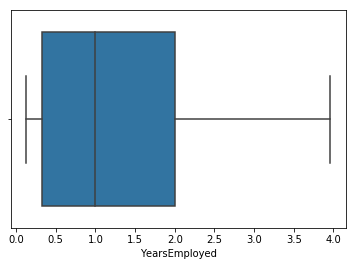

In [288]:
sns.boxplot( x=filt_df["YearsEmployed"] )

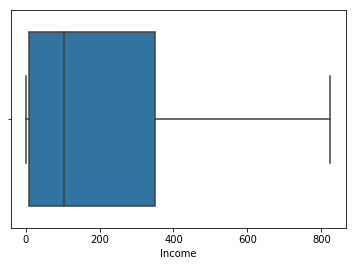

In [289]:
sns.boxplot( x=filt_df["Income"] )

In [291]:
normalityTestforCreditCardScore = stats.normaltest(filt_df['Credi1Score'])

In [295]:
if normalityTestforCreditCardScore[1]>0.05:
    print ("data1 is normally distributed ")
else:
    print ("data1 is not normally distributed ")


data1 is not normally distributed 


In [296]:
normalityTestforIncome = stats.normaltest(filt_df['Income'])

In [297]:
if normalityTestforIncome[1]>0.05:
    print ("data1 is normally distributed ")
else:
    print ("data1 is not normally distributed ")

data1 is not normally distributed 


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


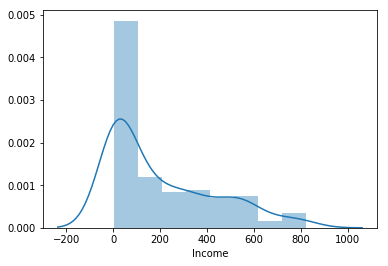

In [298]:
sns.distplot(filt_df['Income']);

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


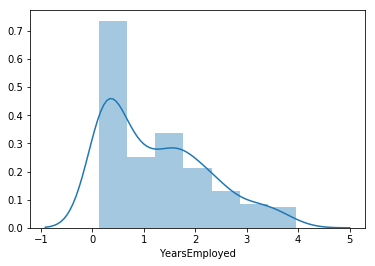

In [299]:
sns.distplot(filt_df['YearsEmployed']);

In [300]:
print (filt_df['YearsEmployed'].describe())


count    196.000000
mean       1.250944
std        1.000490
min        0.125000
25%        0.323750
50%        1.000000
75%        2.000000
max        3.960000
Name: YearsEmployed, dtype: float64


In [301]:
print (filt_df['Income'].describe())


count    196.000000
mean     203.729592
std      228.504667
min        1.000000
25%       10.000000
50%      104.000000
75%      350.250000
max      824.000000
Name: Income, dtype: float64
